In [12]:
# Ëá™Âä®ËÆ°ÁÆócellÁöÑËÆ°ÁÆóÊó∂Èó¥
%load_ext autotime

%config InlineBackend.figure_format='svg' #Áü¢ÈáèÂõæËÆæÁΩÆÔºåËÆ©ÁªòÂõæÊõ¥Ê∏ÖÊô∞

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 16.3 ms (started: 2021-08-12 23:15:23 +08:00)


In [2]:
%%bash

# Â¢ûÂä†Êõ¥Êñ∞
git add *.ipynb

git remote -v

git commit -m 'Êõ¥Êñ∞ ch4 #3 change Aug 12, 2021'

git push origin master

origin	git@github.com:ustchope/Advanced-Deep-Learning-with-Keras.git (fetch)
origin	git@github.com:ustchope/Advanced-Deep-Learning-with-Keras.git (push)
[master 8db3e23] Êõ¥Êñ∞ ch4 #2 change Aug 12, 2021
 1 file changed, 13774 insertions(+), 872 deletions(-)
 rewrite ch4.ipynb (68%)


To git@github.com:ustchope/Advanced-Deep-Learning-with-Keras.git
   0742a64..8db3e23  master -> master


time: 5.12 s (started: 2021-08-12 22:47:35 +08:00)


In [13]:
#ËÆæÁΩÆ‰ΩøÁî®ÁöÑgpu
import tensorflow as tf

gpus = tf.config.list_physical_devices("GPU")

if gpus:
   
    gpu0 = gpus[0] #Â¶ÇÊûúÊúâÂ§ö‰∏™GPUÔºå‰ªÖ‰ΩøÁî®Á¨¨0‰∏™GPU
    tf.config.experimental.set_memory_growth(gpu0, True) #ËÆæÁΩÆGPUÊòæÂ≠òÁî®ÈáèÊåâÈúÄ‰ΩøÁî®
    # ÊàñËÄÖ‰πüÂèØ‰ª•ËÆæÁΩÆGPUÊòæÂ≠ò‰∏∫Âõ∫ÂÆö‰ΩøÁî®Èáè(‰æãÂ¶ÇÔºö4G)
    #tf.config.experimental.set_virtual_device_configuration(gpu0,
    #    [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)]) 
    tf.config.set_visible_devices([gpu0],"GPU")

time: 1.08 ms (started: 2021-08-12 23:15:26 +08:00)


# ÁîüÊàêÂØπÊäóÁΩëÁªú (GAN)

Âú®Êú¨Á´†‰∏≠ÔºåÊàë‰ª¨Â∞ÜÁ†îÁ©∂ÁîüÊàêÂØπÊäóÁΩëÁªú (GAN)„ÄÇ GAN Â±û‰∫éÁîüÊàêÊ®°ÂûãÂÆ∂Êóè„ÄÇ ÁÑ∂ËÄåÔºå‰∏éËá™Âä®ÁºñÁ†ÅÂô®‰∏çÂêåÔºåÁîüÊàêÊ®°ÂûãËÉΩÂ§üÂú®ÁªôÂÆö‰ªªÊÑèÁºñÁ†ÅÁöÑÊÉÖÂÜµ‰∏ãÂàõÂª∫Êñ∞ÁöÑ„ÄÅÊúâÊÑè‰πâÁöÑËæìÂá∫„ÄÇ

Âú®Êú¨Á´†‰∏≠ÔºåÂ∞ÜËÆ®ËÆ∫ GAN ÁöÑÂ∑•‰ΩúÂéüÁêÜ„ÄÇ Êàë‰ª¨ËøòÂ∞ÜÂõûÈ°æ‰ΩøÁî® tf.keras ÁöÑÂá†‰∏™Êó©Êúü GAN ÁöÑÂÆûÁé∞ÔºåËÄåÂú®Êú¨Á´†ÁöÑÂêéÈù¢ÔºåÊàë‰ª¨Â∞ÜÊºîÁ§∫ÂÆûÁé∞Á®≥ÂÆöËÆ≠ÁªÉÊâÄÈúÄÁöÑÊäÄÊúØ„ÄÇ Êú¨Á´†ÁöÑËåÉÂõ¥Ê∂µÁõñ‰∫Ü GAN ÂÆûÁé∞ÁöÑ‰∏§‰∏™ÊµÅË°åÁ§∫‰æãÔºåÊ∑±Â∫¶Âç∑ÁßØ GAN (DCGAN) ÂíåÊù°‰ª∂ GAN (CGAN)„ÄÇ

ÊÄª‰πãÔºåÊú¨Á´†ÁöÑÁõÆÊ†áÊòØÔºö
* ‰ªãÁªç GAN ÁöÑÂéüÁêÜ
* Â±ïÁ§∫ GAN ÁöÑÊó©ÊúüÂ∑•‰ΩúÂÆûÁé∞‰πã‰∏ÄÔºåÁß∞‰∏∫DCGAN
* ‰∏ÄÁßçÁß∞‰∏∫ CGAN ÁöÑÊîπËøõ DCGANÔºåÂÆÉ‰ΩøÁî®Êù°‰ª∂
* Âú® tf.keras ‰∏≠ÂÆûÁé∞ DCGAN Âíå CGAN

ËÆ©Êàë‰ª¨‰ªé GAN ÁöÑÊ¶ÇËø∞ÂºÄÂßã„ÄÇ

## GAN Ê¶ÇËø∞

Âú®Êàë‰ª¨ËøõÂÖ• GAN ÁöÑÊõ¥È´òÁ∫ßÊ¶ÇÂøµ‰πãÂâçÔºåËÆ©Êàë‰ª¨ÂÖàÂõûÈ°æ‰∏Ä‰∏ã GAN Âπ∂‰ªãÁªçÂÆÉ‰ª¨ËÉåÂêéÁöÑÂü∫Êú¨Ê¶ÇÂøµ„ÄÇ GAN ÈùûÂ∏∏Âº∫Â§ßÔºõ Ëøô‰∏™ÁÆÄÂçïÁöÑÈôàËø∞ÂæóÂà∞‰∫Ü‰ª•‰∏ã‰∫ãÂÆûÁöÑËØÅÊòéÔºöÂÆÉ‰ª¨ÂèØ‰ª•ÈÄöËøáÊâßË°åÊΩúÂú®Á©∫Èó¥ÊèíÂÄºÊù•ÁîüÊàê‰∏çÊòØÁúü‰∫∫ÁöÑÊñ∞‰∫∫ËÑ∏„ÄÇ

Âú®Ëøô‰∫õ YouTube ËßÜÈ¢ë‰∏≠ÂèØ‰ª•ÁúãÂà∞ GAN ÁöÑÈ´òÁ∫ßÂäüËÉΩÔºö
* Ê∏êËøõÂºè GAN [4]Ôºöhttps://youtu.be/G06dEcZ-QTg
* StyleGAN v1 [5]Ôºöhttps://youtu.be/kSLJriaOumA
* StyleGAN v2 [6]Ôºöhttps://youtu.be/c-NJtV9Jvp0

Â±ïÁ§∫Â¶Ç‰ΩïÂà©Áî® GAN ÁîüÊàêÈÄºÁúü‰∫∫ËÑ∏ÁöÑËßÜÈ¢ëÂ±ïÁ§∫‰∫ÜÂÆÉ‰ª¨ÁöÑÂº∫Â§ßÂäüËÉΩ„ÄÇËøô‰∏™‰∏ªÈ¢òÊØîÊàë‰ª¨‰πãÂâçÂú®Êú¨‰π¶‰∏≠ÁúãÂà∞ÁöÑ‰ªª‰ΩïÂÜÖÂÆπÈÉΩË¶ÅÂÖàËøõÂæóÂ§ö„ÄÇ‰æãÂ¶ÇÔºå‰∏äÈù¢ÁöÑËßÜÈ¢ëÊºîÁ§∫‰∫ÜËá™Âä®ÁºñÁ†ÅÂô®Êó†Ê≥ïËΩªÊùæÂÆåÊàêÁöÑ‰∫ãÊÉÖÔºåÊàë‰ª¨Âú®Á¨¨ 3 Á´†ÔºåËá™Âä®ÁºñÁ†ÅÂô®‰∏≠‰ªãÁªç‰∫ÜËøô‰∫õÂÜÖÂÆπ„ÄÇ

GAN ËÉΩÂ§üÈÄöËøáËÆ≠ÁªÉ‰∏§‰∏™Ë¢´Áß∞‰∏∫ÁîüÊàêÂô®ÂíåÈâ¥Âà´Âô®ÔºàÊúâÊó∂Áß∞‰∏∫ËØÑËÆ∫ÂÆ∂ÔºâÁöÑÁ´û‰∫âÔºàÂíåÂêà‰ΩúÔºâÁΩëÁªúÊù•Â≠¶‰π†Â¶Ç‰ΩïÂØπËæìÂÖ•ÂàÜÂ∏ÉËøõË°åÂª∫Ê®°„ÄÇÁîüÊàêÂô®ÁöÑ‰ΩúÁî®ÊòØ‰∏çÊñ≠ÂºÑÊ∏ÖÊ•öÂ¶Ç‰ΩïÁîüÊàêÂèØ‰ª•Ê¨∫È™óÈâ¥Âà´Âô®ÁöÑËôöÂÅáÊï∞ÊçÆÊàñ‰ø°Âè∑ÔºàÂåÖÊã¨Èü≥È¢ëÂíåÂõæÂÉèÔºâ„ÄÇÂêåÊó∂ÔºåÈâ¥Âà´Âô®Ë¢´ËÆ≠ÁªÉÊù•Âå∫ÂàÜÂÅá‰ø°Âè∑ÂíåÁúüÂÆû‰ø°Âè∑„ÄÇÈöèÁùÄËÆ≠ÁªÉÁöÑËøõË°åÔºåÂà§Âà´Âô®Â∞Ü‰∏çÂÜçËÉΩÂ§üÁúãÂà∞ÂêàÊàêÁîüÊàêÁöÑÊï∞ÊçÆÂíåÁúüÂÆûÊï∞ÊçÆ‰πãÈó¥ÁöÑÂ∑ÆÂºÇ„ÄÇ‰ªéÈÇ£ÈáåÔºåÂèØ‰ª•‰∏¢ÂºÉÈâ¥Âà´Âô®ÔºåÁÑ∂ÂêéÂèØ‰ª•‰ΩøÁî®ÁîüÊàêÂô®Êù•ÂàõÂª∫‰ª•Ââç‰ªéÊú™ËßÇÂØüÂà∞ÁöÑÊñ∞ÁöÑÁúüÂÆûÊï∞ÊçÆ„ÄÇ

GAN ÁöÑÂü∫Êú¨Ê¶ÇÂøµÂæàÁÆÄÂçï„ÄÇ ÁÑ∂ËÄåÔºåÊàë‰ª¨‰ºöÂèëÁé∞ÁöÑ‰∏Ä‰ª∂‰∫ãÊòØÔºåÊúÄÂÖ∑ÊåëÊàòÊÄßÁöÑÈóÆÈ¢òÊòØÊàë‰ª¨Â¶Ç‰ΩïÂÆûÁé∞ÁîüÊàêÂô®-Èâ¥Âà´Âô®ÁΩëÁªúÁöÑÁ®≥ÂÆöËÆ≠ÁªÉÔºü ÁîüÊàêÂô®ÂíåÈâ¥Âà´Âô®‰πãÈó¥ÂøÖÈ°ªÂ≠òÂú®ËâØÊÄßÁ´û‰∫âÔºå‰ª•‰æø‰∏§‰∏™ÁΩëÁªúËÉΩÂ§üÂêåÊó∂Â≠¶‰π†„ÄÇ Áî±‰∫éÊçüÂ§±ÂáΩÊï∞ÊòØÊ†πÊçÆÈâ¥Âà´Âô®ÁöÑËæìÂá∫ËÆ°ÁÆóÁöÑÔºåÂõ†Ê≠§ÂÖ∂ÂèÇÊï∞Êõ¥Êñ∞ÂæàÂø´„ÄÇ ÂΩìÂà§Âà´Âô®Êî∂ÊïõÂæóÊõ¥Âø´Êó∂ÔºåÁîüÊàêÂô®‰∏çÂÜç‰∏∫ÂÖ∂ÂèÇÊï∞Êé•Êî∂Ë∂≥Â§üÁöÑÊ¢ØÂ∫¶Êõ¥Êñ∞Âπ∂‰∏îÊó†Ê≥ïÊî∂Êïõ„ÄÇ Èô§‰∫ÜÈöæ‰ª•ËÆ≠ÁªÉ‰πãÂ§ñÔºåGAN ËøòÂèØËÉΩÈÅ≠ÂèóÈÉ®ÂàÜÊàñÂÖ®ÈÉ®Ê®°ÊÄÅÂ¥©Ê∫ÉÔºåÂú®ËøôÁßçÊÉÖÂÜµ‰∏ãÔºåÁîüÊàêÂô®‰∏∫‰∏çÂêåÁöÑÊΩúÂú®ÁºñÁ†Å‰∫ßÁîüÂá†‰πéÁõ∏‰ººÁöÑËæìÂá∫„ÄÇ

### GANsÂéüÁêÜ

Â¶ÇÂõæ 4.1.1 ÊâÄÁ§∫ÔºåGAN Á±ª‰ºº‰∫éÈÄ†ÂÅáËÄÖÔºàÁîüÊàêÂô®Ôºâ-Ë≠¶ÂØüÔºàÈâ¥Âà´Âô®ÔºâÁöÑÂú∫ÊôØ„ÄÇ Âú®Â≠¶Èô¢ÈáåÔºåË≠¶ÂØüË¢´ÊïôÂØºÂ¶Ç‰ΩïÁ°ÆÂÆö‰∏ÄÁæéÂÖÉÈíûÁ•®ÊòØÁúüËøòÊòØÂÅá„ÄÇ Êù•Ëá™Èì∂Ë°åÁöÑÁúüÁæéÂÖÉÈíûÁ•®Ê†∑Êú¨ÂíåÊù•Ëá™‰º™ÈÄ†ËÄÖÁöÑÂÅáÂ∏ÅÊ†∑Êú¨Ë¢´Áî®Êù•ËÆ≠ÁªÉË≠¶ÂØü„ÄÇ ÁÑ∂ËÄåÔºåÊúâÊó∂ÔºåÈÄ†ÂÅáËÄÖ‰ºöËØïÂõæÂÅáË£Ö‰ªñÂç∞ÁöÑÊòØÁúüÈíûÁ•®„ÄÇ ÊúÄÂàùÔºåË≠¶ÂØü‰∏ç‰ºö‰∏äÂΩìÔºå‰ºöÂëäËØâÈÄ†ÂÅáËÄÖ‰∏∫‰ªÄ‰πàÈí±ÊòØÂÅáÁöÑ„ÄÇ ËÄÉËôëÂà∞ËøôÁßçÂèçÈ¶àÔºåÈÄ†ÂÅáËÄÖÂÜçÊ¨°Á£®ÁªÉËá™Â∑±ÁöÑÊäÄËÉΩÔºåÂπ∂ËØïÂõæÂà∂ÈÄ†Êñ∞ÁöÑÂÅáÁæéÂÖÉÈíûÁ•®„ÄÇ Ê≠£Â¶ÇÈ¢ÑÊúüÁöÑÈÇ£Ê†∑ÔºåË≠¶ÊñπÂ∞ÜËÉΩÂ§üÂèëÁé∞Ëøô‰∫õÈí±ÊòØÂÅáÁöÑÔºåÂπ∂ËØÅÊòéÁæéÂÖÉÈíûÁ•®ÊòØÂÅáÁöÑÔºö

![](https://tva1.sinaimg.cn/large/008i3skNgy1gte4futnx5j618q0u079802.jpg)

Ëøô‰∏™ËøáÁ®ã‰ºöÊó†ÈôêÊúüÂú∞ÊåÅÁª≠‰∏ãÂéªÔºå‰ΩÜÊúÄÁªàÈÄ†ÂÅáËÄÖÂ∑≤ÁªèÊéåÊè°‰∫ÜÂà∂ÈÄ†ÂÅáÂ∏ÅÁöÑËÉΩÂäõÔºå‰ª•Ëá≥‰∫éÂÅáÂ∏Å‰∏éÁúüÈí±Êó†Ê≥ïÂå∫ÂàÜ‚Äî‚ÄîÂç≥‰ΩøÊòØÊúÄ‰∏ì‰∏öÁöÑË≠¶ÂØü‰πüÊòØÂ¶ÇÊ≠§„ÄÇ ÁÑ∂ÂêéÔºåÈÄ†ÂÅáËÄÖÂèØ‰ª•Êó†ÈôêÂç∞Âà∑ÁæéÂÖÉÈíûÁ•®ËÄå‰∏ç‰ºöË¢´Ë≠¶ÂØüÊäì‰ΩèÔºåÂõ†‰∏∫ÂÆÉ‰ª¨‰∏çÂÜçË¢´ËØÜÂà´‰∏∫‰º™ÈÄ†ÂìÅ„ÄÇ

Â¶ÇÂõæ 4.1.2 ÊâÄÁ§∫Ôºå‰∏Ä‰∏™ GAN Áî±‰∏§‰∏™ÁΩëÁªúÁªÑÊàêÔºå‰∏Ä‰∏™ÁîüÊàêÂô®Âíå‰∏Ä‰∏™Âà§Âà´Âô®Ôºö

![](https://tva1.sinaimg.cn/large/008i3skNgy1gte4j3gtpdj61ag0ooju302.jpg)

ÂèëÁîüÂô®ÁöÑËæìÂÖ•ÊòØÂô™Â£∞ÔºåËæìÂá∫ÊòØÂêàÊàêÊï∞ÊçÆ„ÄÇÂêåÊó∂ÔºåÈâ¥Âà´Âô®ÁöÑËæìÂÖ•Â∞ÜÊòØÁúüÂÆûÊï∞ÊçÆÊàñÂêàÊàêÊï∞ÊçÆ„ÄÇÁúüÂÆûÊï∞ÊçÆÊù•Ëá™ÁúüÂÆûÈááÊ†∑Êï∞ÊçÆÔºåËÄåÂÅáÊï∞ÊçÆÊù•Ëá™ÁîüÊàêÂô®„ÄÇÊâÄÊúâÊúâÊïàÊï∞ÊçÆÈÉΩÊ†áËÆ∞‰∏∫ 1.0ÔºàÂç≥ 100% ÁöÑÁúüÂÆûÊ¶ÇÁéáÔºâÔºåËÄåÊâÄÊúâÂêàÊàêÊï∞ÊçÆÈÉΩÊ†áËÆ∞‰∏∫ 0.0ÔºàÂç≥ÁúüÂÆûÊ¶ÇÁéá‰∏∫ 0%Ôºâ„ÄÇÁî±‰∫éÊ†áËÆ∞ËøáÁ®ãÊòØËá™Âä®ÂåñÁöÑÔºåGAN ‰ªçÁÑ∂Ë¢´ËÆ§‰∏∫ÊòØÊ∑±Â∫¶Â≠¶‰π†‰∏≠Êó†ÁõëÁù£Â≠¶‰π†ÊñπÊ≥ïÁöÑ‰∏ÄÈÉ®ÂàÜ„ÄÇ

Èâ¥Âà´Âô®ÁöÑÁõÆÊ†áÊòØ‰ªéËøô‰∏™Êèê‰æõÁöÑÊï∞ÊçÆÈõÜ‰∏≠Â≠¶‰π†Â¶Ç‰ΩïÂå∫ÂàÜÁúüÂÆûÊï∞ÊçÆÂíåËôöÂÅáÊï∞ÊçÆ„ÄÇÂú®ËøôÈÉ®ÂàÜ GAN ËÆ≠ÁªÉÊúüÈó¥ÔºåÂè™‰ºöÊõ¥Êñ∞Èâ¥Âà´Âô®ÂèÇÊï∞„ÄÇ‰∏éÂÖ∏ÂûãÁöÑ‰∫åÂÖÉÂàÜÁ±ªÂô®‰∏ÄÊ†∑ÔºåÈâ¥Âà´Âô®Ë¢´ËÆ≠ÁªÉ‰ª•Âú® 0.0 Âà∞ 1.0 ÁöÑËåÉÂõ¥ÂÜÖÈ¢ÑÊµãÁªôÂÆöËæìÂÖ•Êï∞ÊçÆ‰∏éÁúüÂÆûÊï∞ÊçÆÁöÑÊé•ËøëÁ®ãÂ∫¶„ÄÇÁÑ∂ËÄåÔºåËøôÂè™ÊòØÊïÖ‰∫ãÁöÑ‰∏ÄÂçä„ÄÇ

ÊØèÈöî‰∏ÄÊÆµÊó∂Èó¥ÔºåÁîüÊàêÂô®‰ºöÂÅáË£ÖÂÖ∂ËæìÂá∫ÊòØÁúüÂÆûÊï∞ÊçÆÔºåÂπ∂Ë¶ÅÊ±Ç GAN Â∞ÜÂÖ∂Ê†áËÆ∞‰∏∫ 1.0„ÄÇÂΩìÂÅáÊï∞ÊçÆË¢´ÂëàÁé∞ÁªôÈâ¥Âà´Âô®Êó∂ÔºåËá™ÁÑ∂‰ºöË¢´ÂΩíÁ±ª‰∏∫Ê†áÁ≠æÊé•Ëøë 0.0 ÁöÑÂÅáÊï∞ÊçÆ„ÄÇ

‰ºòÂåñÂô®Ê†πÊçÆÊòæÁ§∫ÁöÑÊ†áÁ≠æÔºàÂç≥ 1.0ÔºâËÆ°ÁÆóÁîüÊàêÂô®ÂèÇÊï∞Êõ¥Êñ∞„ÄÇÂú®ÂØπËøô‰∫õÊñ∞Êï∞ÊçÆËøõË°åËÆ≠ÁªÉÊó∂ÔºåÂÆÉËøòËÄÉËôë‰∫ÜËá™Â∑±ÁöÑÈ¢ÑÊµã„ÄÇÊç¢Âè•ËØùËØ¥ÔºåÂà§Âà´Âô®ÂØπÂÖ∂È¢ÑÊµãÊúâ‰∏Ä‰∫õÊÄÄÁñëÔºåÂõ†Ê≠§ÔºåGAN ‰ºöËÄÉËôëÂà∞Ëøô‰∏ÄÁÇπ„ÄÇËøô‰∏ÄÊ¨°ÔºåGAN ‰ºöËÆ©Ê¢ØÂ∫¶‰ªéÈâ¥Âà´Âô®ÁöÑÊúÄÂêé‰∏ÄÂ±ÇÂêë‰∏ã‰º†Êí≠Âà∞ÁîüÊàêÂô®ÁöÑÁ¨¨‰∏ÄÂ±Ç„ÄÇÁÑ∂ËÄåÔºåÂú®Â§ßÂ§öÊï∞ÂÆûË∑µ‰∏≠ÔºåÂú®Ëøô‰∏™ËÆ≠ÁªÉÈò∂ÊÆµÔºåÈâ¥Âà´Âô®ÂèÇÊï∞‰ºöË¢´ÊöÇÊó∂ÂÜªÁªì„ÄÇÁîüÊàêÂô®Â∞Ü‰ΩøÁî®Ê¢ØÂ∫¶Êõ¥Êñ∞ÂÖ∂ÂèÇÊï∞Âπ∂ÊèêÈ´òÂÖ∂ÂêàÊàêÂÅáÊï∞ÊçÆÁöÑËÉΩÂäõ„ÄÇ

ÊÄªÁöÑÊù•ËØ¥ÔºåÊï¥‰∏™ËøáÁ®ãÁ±ª‰ºº‰∫é‰∏§‰∏™ÁΩëÁªúÁõ∏‰∫íÁ´û‰∫âÔºåÂêåÊó∂‰ªçÁÑ∂Âêà‰Ωú„ÄÇÂΩì GAN ËÆ≠ÁªÉÊî∂ÊïõÊó∂ÔºåÊúÄÁªàÁªìÊûúÊòØ‰∏Ä‰∏™ÂèØ‰ª•ÂêàÊàêÁúãËµ∑Êù•ÁúüÂÆûÁöÑÊï∞ÊçÆÁöÑÁîüÊàêÂô®„ÄÇÈâ¥Âà´Âô®ËÆ§‰∏∫Ëøô‰∏™ÂêàÊàêÊï∞ÊçÆÊòØÁúüÂÆûÁöÑÊàñËÄÖÊ†áÁ≠æÊé•Ëøë 1.0ÔºåËøôÊÑèÂë≥ÁùÄÈâ¥Âà´Âô®ÂèØ‰ª•Ë¢´‰∏¢ÂºÉ„ÄÇÂèëÁîüÂô®ÈÉ®ÂàÜÂ∞ÜÊúâÂä©‰∫é‰ªé‰ªªÊÑèÂô™Â£∞ËæìÂÖ•‰∫ßÁîüÊúâÊÑè‰πâÁöÑËæìÂá∫„ÄÇ

‰∏ãÈù¢ÁöÑÂõæ 4.1.3 Ê¶ÇËø∞‰∫ÜËØ•ËøáÁ®ãÔºö

![](https://tva1.sinaimg.cn/large/008i3skNgy1gte4nf7lqvj61as0m0gon02.jpg)

Â¶Ç‰∏äÂõæÊâÄÁ§∫ÔºåÂèØ‰ª•ÈÄöËøáÊúÄÂ∞èÂåñ‰ª•‰∏ãÁ≠âÂºè‰∏≠ÁöÑÊçüÂ§±ÂáΩÊï∞Êù•ËÆ≠ÁªÉÂà§Âà´Âô®Ôºö

![](https://tva1.sinaimg.cn/large/008i3skNgy1gte4rsbhgzj618004cwet02.jpg)

ËØ•ÊñπÁ®ãÂè™ÊòØÊ†áÂáÜÁöÑ‰∫åÂÖÉ‰∫§ÂèâÁÜµÊàêÊú¨ÂáΩÊï∞„ÄÇ ÊçüÂ§±ÊòØÊ≠£Á°ÆËØÜÂà´ÁúüÂÆûÊï∞ÊçÆÁöÑÊúüÊúõÂÄº ùíü(ùíô) Âíå 1.0 ÂáèÂéªÊ≠£Á°ÆËØÜÂà´ÂêàÊàêÊï∞ÊçÆÁöÑÊúüÊúõÂÄº 1 ‚àí ùíü(ùí¢(ùíõ)) ÁöÑË¥üÂíå„ÄÇ Êó•Âøó‰∏ç‰ºöÊõ¥ÊîπÂ±ÄÈÉ®ÊúÄÂ∞èÂÄºÁöÑ‰ΩçÁΩÆ„ÄÇ

ËÆ≠ÁªÉÊúüÈó¥ÂêëÂà§Âà´Âô®Êèê‰æõ‰∏§‰∏™Â∞èÊâπÈáèÊï∞ÊçÆÔºö
1. xÔºåÊù•Ëá™ÈááÊ†∑Êï∞ÊçÆÁöÑÁúüÂÆûÊï∞ÊçÆÔºàÊç¢Âè•ËØùËØ¥Ôºå$ùíô \sim p_{data}$ÔºâÔºåÊ†áÁ≠æ‰∏∫ 1.0
2. ùíô‚Ä≤ = ùí¢(ùíõ)ÔºåÊù•Ëá™ÁîüÊàêÂô®ÁöÑÂÅáÊï∞ÊçÆÔºåÊ†áÁ≠æ‰∏∫ 0.0

‰∏∫‰∫ÜÊúÄÂ∞èÂåñÊçüÂ§±ÂáΩÊï∞ÔºåÈâ¥Âà´Âô®ÂèÇÊï∞ ùúΩ(ùê∑) Â∞ÜÈÄöËøáÂèçÂêë‰º†Êí≠ÈÄöËøáÊ≠£Á°ÆËØÜÂà´ÁúüÂÆûÊï∞ÊçÆ ùíü(ùíô) ÂíåÂêàÊàêÊï∞ÊçÆ 1 ‚àí ùíü(ùí¢(ùíõ)) ËøõË°åÊõ¥Êñ∞„ÄÇ Ê≠£Á°ÆËØÜÂà´ÁúüÂÆûÊï∞ÊçÆÁõ∏ÂΩì‰∫é ùíü(ùíô) ‚Üí 1.0ÔºåËÄåÊ≠£Á°ÆËØÜÂà´ËôöÂÅáÊï∞ÊçÆÁõ∏ÂΩì‰∫é ùíü(ùí¢(ùíõ)) ‚Üí 0.0 Êàñ (1 ‚àí ùíü(ùí¢(ùíõ))) ‚Üí 1.0„ÄÇ Âú®Ëøô‰∏™Á≠âÂºè‰∏≠Ôºåz ÊòØÁîüÊàêÂô®Áî®Êù•ÂêàÊàêÊñ∞‰ø°Âè∑ÁöÑ‰ªªÊÑèÁºñÁ†ÅÊàñÂô™Â£∞ÂêëÈáè„ÄÇ ‰∏§ËÄÖÈÉΩÊúâÂä©‰∫éÊúÄÂ∞èÂåñÊçüÂ§±ÂáΩÊï∞„ÄÇ

‰∏∫‰∫ÜËÆ≠ÁªÉÁîüÊàêÂô®ÔºåGAN Â∞ÜÈâ¥Âà´Âô®ÂíåÁîüÊàêÂô®ÊçüÂ§±ÁöÑÊÄªÂíåËßÜ‰∏∫Èõ∂ÂíåÊ∏∏Êàè„ÄÇ ÁîüÊàêÂô®ÊçüÂ§±ÂáΩÊï∞Âè™ÊòØÂà§Âà´Âô®ÊçüÂ§±ÂáΩÊï∞ÁöÑË¥üÂÄºÔºö

![](https://tva1.sinaimg.cn/large/008i3skNgy1gte5dpon0rj617u0420sv02.jpg)

ÁÑ∂ÂêéÂèØ‰ª•Êõ¥ÊÅ∞ÂΩìÂú∞Â∞ÜÂÖ∂ÈáçÂÜô‰∏∫ÂÄºÂáΩÊï∞Ôºö

![](https://tva1.sinaimg.cn/large/008i3skNgy1gte5h7dz59j617o03gt8u02.jpg)

‰ªéÁîüÊàêÂô®ÁöÑËßíÂ∫¶Êù•ÁúãÔºåÂÖ¨Âºè 4.1.3 Â∫îËØ•ÊúÄÂ∞èÂåñ„ÄÇ ‰ªéÂà§Âà´Âô®ÁöÑËßíÂ∫¶Êù•ÁúãÔºåÂ∫îËØ•ÊúÄÂ§ßÂåñ‰ª∑ÂÄºÂáΩÊï∞„ÄÇ Âõ†Ê≠§ÔºåÁîüÊàêÂô®ËÆ≠ÁªÉÂáÜÂàôÂèØ‰ª•ÂÜôÊàê‰∏Ä‰∏™ÊûÅÂ§ßÊûÅÂ∞èÈóÆÈ¢òÔºö

![](https://tva1.sinaimg.cn/large/008i3skNgy1gte5i3hssoj617i04074h02.jpg)

ÊúâÊó∂ÔºåÊàë‰ª¨‰ºöÂÅáË£ÖÂêàÊàêÊï∞ÊçÆÊòØÁúüÂÆûÁöÑÔºåÊ†áÁ≠æ‰∏∫ 1.0Ôºå‰ª•Ê≠§Êù•Ê¨∫È™óÈâ¥Âà´Âô®„ÄÇ ÈÄöËøáÊúÄÂ§ßÂåñ ùúΩ(ùê∑)Ôºå‰ºòÂåñÂô®ÂêëÈâ¥Âà´Âô®ÂèÇÊï∞ÂèëÈÄÅÊ¢ØÂ∫¶Êõ¥Êñ∞Ôºå‰ª•Â∞ÜËøô‰∫õÂêàÊàêÊï∞ÊçÆËßÜ‰∏∫ÁúüÂÆûÊï∞ÊçÆ„ÄÇ ÂêåÊó∂ÔºåÈÄöËøáÂÖ≥‰∫é ùúΩ(ùê∫) ÁöÑÊúÄÂ∞èÂåñÔºå‰ºòÂåñÂô®Â∞ÜËÆ≠ÁªÉÁîüÊàêÂô®ÁöÑÂèÇÊï∞Â¶Ç‰ΩïÊ¨∫È™óÈâ¥Âà´Âô®„ÄÇ ÁÑ∂ËÄåÔºåÂú®ÂÆûË∑µ‰∏≠ÔºåÈâ¥Âà´Âô®ÂØπÂÖ∂Â∞ÜÂêàÊàêÊï∞ÊçÆÂàÜÁ±ª‰∏∫ÂÅáÊï∞ÊçÆÁöÑÈ¢ÑÊµãÂÖÖÊª°‰ø°ÂøÉÔºåÂπ∂‰∏î‰∏ç‰ºöÊõ¥Êñ∞ GAN ÂèÇÊï∞„ÄÇ Ê≠§Â§ñÔºåÊ¢ØÂ∫¶Êõ¥Êñ∞ÂæàÂ∞èÔºåÂπ∂‰∏îÈöèÁùÄÂÆÉ‰ª¨‰º†Êí≠Âà∞ÁîüÊàêÂô®Â±ÇËÄåÊòæÁùÄÂáèÂ∞ë„ÄÇ ÁªìÊûúÔºåÁîüÊàêÂô®Êó†Ê≥ïÊî∂Êïõ„ÄÇ

![](https://tva1.sinaimg.cn/large/008i3skNgy1gte5kt2i6kj61c60kkgnw02.jpg)

Ëß£ÂÜ≥ÊñπÊ°àÊòØÂ∞ÜÁîüÊàêÂô®ÁöÑÊçüÂ§±ÂáΩÊï∞ÈáçÊñ∞Ë°®Ëø∞‰∏∫‰ª•‰∏ãÂΩ¢ÂºèÔºö

![](https://tva1.sinaimg.cn/large/008i3skNgy1gte5lllabvj619203u3yn02.jpg)

ÊçüÂ§±ÂáΩÊï∞Âè™ÊòØÈÄöËøáËÆ≠ÁªÉÁîüÊàêÂô®Êù•ÊúÄÂ§ßÂåñÈâ¥Âà´Âô®Áõ∏‰ø°ÂêàÊàêÊï∞ÊçÆÊòØÁúüÂÆûÁöÑÊú∫‰ºö„ÄÇÊñ∞ÂÖ¨Âºè‰∏çÂÜçÊòØÈõ∂ÂíåÔºåËÄåÊòØÁ∫ØÁ≤πÁöÑÂêØÂèëÂºèÈ©±Âä®„ÄÇÂõæ 4.1.4 ÊòæÁ§∫‰∫ÜËÆ≠ÁªÉÊúüÈó¥ÁöÑÁîüÊàêÂô®„ÄÇÂú®Ëøô‰∏™Âõæ‰∏≠ÔºåÁîüÊàêÂô®ÂèÇÊï∞Âè™ÊúâÂú®Êï¥‰∏™ÂØπÊäóÁΩëÁªúÈÉΩË¢´ËÆ≠ÁªÉÊó∂Êâç‰ºöÊõ¥Êñ∞„ÄÇËøôÊòØÂõ†‰∏∫Ê¢ØÂ∫¶‰ªéÈâ¥Âà´Âô®‰º†ÈÄíÂà∞ÁîüÊàêÂô®„ÄÇÁÑ∂ËÄåÔºåÂú®ÂÆûË∑µ‰∏≠ÔºåÈâ¥Âà´Âô®ÊùÉÈáçÂè™ÊòØÂú®ÂØπÊäóËÆ≠ÁªÉÊúüÈó¥ÊöÇÊó∂ÂÜªÁªì„ÄÇ

Âú®Ê∑±Â∫¶Â≠¶‰π†‰∏≠ÔºåÁîüÊàêÂô®ÂíåÈâ¥Âà´Âô®ÈÉΩÂèØ‰ª•‰ΩøÁî®ÂêàÈÄÇÁöÑÁ•ûÁªèÁΩëÁªúÊû∂ÊûÑÊù•ÂÆûÁé∞„ÄÇÂ¶ÇÊûúÊï∞ÊçÆÊàñ‰ø°Âè∑ÊòØÂõæÂÉèÔºåÁîüÊàêÂô®ÂíåÈâ¥Âà´Âô®ÁΩëÁªúÈÉΩÂ∞Ü‰ΩøÁî® CNN„ÄÇÂØπ‰∫éÈü≥È¢ëÁ≠â‰∏ÄÁª¥Â∫èÂàóÔºå‰∏§‰∏™ÁΩëÁªúÈÄöÂ∏∏ÈÉΩÊòØÂæ™ÁéØÁöÑÔºàRNN„ÄÅLSTM Êàñ GRUÔºâ„ÄÇ

Âú®Êú¨ËäÇ‰∏≠ÔºåÊàë‰ª¨‰∫ÜËß£Âà∞ GAN ËÉåÂêéÁöÑÂéüÁêÜÂæàÁÆÄÂçï„ÄÇÊàë‰ª¨ËøòÂ≠¶‰π†‰∫ÜÂ¶Ç‰ΩïÈÄöËøáÁÜüÊÇâÁöÑÁΩëÁªúÂ±ÇÂÆûÁé∞ GAN„ÄÇ GAN ‰∏éÂÖ∂‰ªñÁΩëÁªúÁöÑ‰∏çÂêå‰πãÂ§ÑÂú®‰∫éÂÆÉ‰ª¨ÂæàÈöæËÆ≠ÁªÉ„ÄÇÂÉèÂ±Ç‰∏≠ÁöÑÂæÆÂ∞èÂèòÂåñËøôÊ†∑ÁÆÄÂçïÁöÑ‰∫ãÊÉÖÂ∞±‰ºöÂØºËá¥ÁΩëÁªúËÆ≠ÁªÉ‰∏çÁ®≥ÂÆö„ÄÇÂú®‰∏ã‰∏ÄËäÇ‰∏≠ÔºåÊàë‰ª¨Â∞ÜÁ†îÁ©∂‰ΩøÁî®Ê∑±Â∫¶ CNN ÁöÑ GAN Êó©ÊúüÊàêÂäüÂÆûÁé∞‰πã‰∏Ä„ÄÇÂÆÉË¢´Áß∞‰∏∫ DCGAN [3]„ÄÇ

## Âú® Keras ‰∏≠ÂÆûÁé∞ DCGAN

Âõæ 4.2.1 ÊòæÁ§∫‰∫ÜÁî®‰∫éÁîüÊàêÂÅá MNIST ÂõæÂÉèÁöÑ DCGANÔºö

![](https://tva1.sinaimg.cn/large/008i3skNgy1gte5po6v6yj61840u0q5y02.jpg)

DCGAN ÂÆûÁé∞‰∫Ü‰ª•‰∏ãËÆæËÆ°ÂéüÂàôÔºö
* ‰ΩøÁî®strides > 1 ÂíåÂç∑ÁßØËÄå‰∏çÊòØMaxPooling2D ÊàñUpSampling2D„ÄÇ ÈöèÁùÄÊ≠•ÂπÖ > 1ÔºåCNN Â≠¶‰π†Â¶Ç‰ΩïË∞ÉÊï¥ÁâπÂæÅÂõæÁöÑÂ§ßÂ∞è„ÄÇ
* ÈÅøÂÖç‰ΩøÁî®ÂØÜÈõÜÂ±Ç„ÄÇ Âú®ÊâÄÊúâÂ±Ç‰∏≠‰ΩøÁî® CNN„ÄÇ ÂØÜÈõÜÂ±Ç‰ªÖÁî®‰ΩúÁîüÊàêÂô®ÁöÑÁ¨¨‰∏ÄÂ±Ç‰ª•Êé•Âèó z ÂêëÈáè„ÄÇ Dense Â±ÇÁöÑËæìÂá∫Ë¢´Ë∞ÉÊï¥Â§ßÂ∞èÂπ∂Êàê‰∏∫ÂêéÁª≠ CNN Â±ÇÁöÑËæìÂÖ•„ÄÇ
* ‰ΩøÁî®ÊâπÈáèÂΩí‰∏ÄÂåñ (BN) ÈÄöËøáÂ∞ÜÊØè‰∏ÄÂ±ÇÁöÑËæìÂÖ•ÂΩí‰∏ÄÂåñ‰∏∫Èõ∂ÂùáÂÄºÂíåÂçï‰ΩçÊñπÂ∑ÆÊù•Á®≥ÂÆöÂ≠¶‰π†„ÄÇ ÁîüÊàêÂô®ËæìÂá∫Â±ÇÂíåÈâ¥Âà´Âô®ËæìÂÖ•Â±ÇÊ≤°ÊúâBN„ÄÇ Âú®Ê≠§Â§Ñ‰ªãÁªçÁöÑÂÆûÁé∞Á§∫‰æã‰∏≠ÔºåÈâ¥Âà´Âô®‰∏≠Ê≤°Êúâ‰ΩøÁî®ÊâπÈáèÂΩí‰∏ÄÂåñ„ÄÇ
* Êï¥ÊµÅÁ∫øÊÄßÂçïÂÖÉ (ReLU) Áî®‰∫éÁîüÊàêÂô®ÁöÑÊâÄÊúâÂ±ÇÔºåËæìÂá∫Â±ÇÈô§Â§ñÔºåÂÖ∂‰∏≠‰ΩøÁî®‰∫Ü tanh ÊøÄÊ¥ª„ÄÇ Âú®Ê≠§Â§Ñ‰ªãÁªçÁöÑÂÆûÁé∞Á§∫‰æã‰∏≠ÔºåÂú®ÁîüÊàêÂô®ÁöÑËæìÂá∫‰∏≠‰ΩøÁî® sigmoid ‰ª£Êõø tanhÔºåÂõ†‰∏∫ÂÆÉÈÄöÂ∏∏‰ºöÂØºËá¥ÂØπ MNIST Êï∞Â≠óÁöÑÊõ¥Á®≥ÂÆöÁöÑËÆ≠ÁªÉ„ÄÇ
* Âú®Èâ¥Âà´Âô®ÁöÑÊâÄÊúâÂ±Ç‰∏≠‰ΩøÁî®Leaky ReLU„ÄÇ ‰∏é ReLU ‰∏çÂêåÁöÑÊòØÔºåLeaky ReLU ‰∏ç‰ºöÂú®ËæìÂÖ•Â∞è‰∫éÈõ∂Êó∂Â∞ÜÊâÄÊúâËæìÂá∫ÂΩíÈõ∂ÔºåËÄåÊòØÁîüÊàê‰∏Ä‰∏™‰∏é alpha x ËæìÂÖ•Áõ∏Á≠âÁöÑÂ∞èÊ¢ØÂ∫¶„ÄÇ Âú®‰ª•‰∏ãÁ§∫‰æã‰∏≠Ôºåalpha = 0.2„ÄÇ

ÁîüÊàêÂô®Â≠¶‰π†‰ªé 100 Áª¥ËæìÂÖ•ÂêëÈáèÔºà[-1.0, 1.0] ËåÉÂõ¥ÂÜÖ 100 Áª¥ÂùáÂåÄÂàÜÂ∏ÉÁöÑÈöèÊú∫Âô™Â£∞ÔºâÁîüÊàêÂÅáÂõæÂÉè„ÄÇÈâ¥Âà´Âô®Â∞ÜÁúüÂÆûÂõæÂÉè‰∏éËôöÂÅáÂõæÂÉèËøõË°åÂàÜÁ±ªÔºå‰ΩÜÂú®ËÆ≠ÁªÉÂØπÊäóÁΩëÁªúÊó∂Êó†ÊÑè‰∏≠ÊåáÂØºÁîüÊàêÂô®Â¶Ç‰ΩïÁîüÊàêÁúüÂÆûÂõæÂÉè„ÄÇÊàë‰ª¨ÁöÑ DCGAN ÂÆûÁé∞‰∏≠‰ΩøÁî®ÁöÑÂÜÖÊ†∏Â§ßÂ∞è‰∏∫ 5„ÄÇËøôÊòØ‰∏∫‰∫ÜÂ¢ûÂä†Âç∑ÁßØÁöÑÊÑüÂèóÈáéÂ§ßÂ∞èÂíåË°®ËææËÉΩÂäõ„ÄÇ

ÁîüÊàêÂô®Êé•ÂèóÁî±ËåÉÂõ¥‰∏∫ -1.0 Âà∞ 1.0 ÁöÑÂùáÂåÄÂàÜÂ∏ÉÁîüÊàêÁöÑ 100 Áª¥ z ÂêëÈáè„ÄÇÁîüÊàêÂô®ÁöÑÁ¨¨‰∏ÄÂ±ÇÊòØ‰∏Ä‰∏™ 7 x 7 x 128 = 6,272 ÂçïÂÖÉÁöÑ Dense Â±Ç„ÄÇÂçï‰ΩçÊï∞ÊòØÊ†πÊçÆËæìÂá∫ÂõæÂÉèÁöÑÈ¢ÑÊúüÊúÄÁªàÂ∞∫ÂØ∏Ôºà28 x 28 x 1Ôºå28 ÊòØ 7 ÁöÑÂÄçÊï∞ÔºâÂíåÁ¨¨‰∏Ä‰∏™ Conv2DTranspose ÁöÑÊª§Ê≥¢Âô®Êï∞ÈáèËÆ°ÁÆóÁöÑÔºåËØ•Êï∞ÈáèÁ≠â‰∫é 128„ÄÇ

Êàë‰ª¨ÂèØ‰ª•Â∞ÜËΩ¨ÁΩÆ CNNÔºàConv2DTransposeÔºâÊÉ≥Ë±°Êàê CNN ÁöÑÈÄÜËøáÁ®ã„ÄÇÂú®‰∏Ä‰∏™ÁÆÄÂçïÁöÑ‰æãÂ≠ê‰∏≠ÔºåÂ¶ÇÊûú CNN Â∞ÜÂõæÂÉèËΩ¨Êç¢‰∏∫ÁâπÂæÅÂõæÔºåÂàôËΩ¨ÁΩÆÁöÑ CNN Â∞ÜÁîüÊàêÁªôÂÆöÁâπÂæÅÂõæÁöÑÂõæÂÉè„ÄÇÂõ†Ê≠§ÔºåÂâç‰∏ÄÁ´†ÁöÑËß£Á†ÅÂô®ÂíåÊú¨Á´†ÁöÑÁîüÊàêÂô®ÈÉΩ‰ΩøÁî®‰∫ÜËΩ¨ÁΩÆ CNN„ÄÇ

> Ê∏ÖÂçï 4.2.1Ôºödcgan-mnist-4.2.1.py

In [20]:
'''Trains DCGAN on MNIST using Keras

DCGAN ÊòØ‰ΩøÁî® CNN ÁöÑÁîüÊàêÂØπÊäóÁΩëÁªú (GAN)„ÄÇ ÁîüÊàêÂô®ËØïÂõæÈÄöËøáÁîüÊàêÂÅáÂõæÂÉèÊù•Ê¨∫È™óÈâ¥Âà´Âô®„ÄÇ 
Èâ¥Âà´Âô®Â≠¶‰π†Âå∫ÂàÜÁúüÂÅáÂõæÂÉè„ÄÇ ÁîüÊàêÂô®+Èâ¥Âà´Âô®ÂΩ¢ÊàêÂØπÊäóÁΩëÁªú„ÄÇ DCGAN ‰∫§ÊõøËÆ≠ÁªÉÈâ¥Âà´Âô®ÂíåÂØπÊäóÁΩëÁªú„ÄÇ 
Âú®ËÆ≠ÁªÉÊúüÈó¥ÔºåÈâ¥Âà´Âô®‰∏ç‰ªÖÂ≠¶‰π†Âå∫ÂàÜÁúüÂÅáÂõæÂÉèÔºåËøòÊåáÂØºÂØπÊäóÁöÑÁîüÊàêÂô®ÈÉ®ÂàÜÂ¶Ç‰ΩïÊèêÈ´òÂÖ∂ÁîüÊàêÂÅáÂõæÂÉèÁöÑËÉΩÂäõ„ÄÇ

[1] Radford, Alec, Luke Metz, and Soumith Chintala.
"Unsupervised representation learning with deep convolutional
generative adversarial networks." arXiv preprint arXiv:1511.06434 (2015).
'''


from tensorflow.keras.layers import Activation, Dense, Input
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.layers import Reshape, Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model

from tensorflow.keras import layers


import numpy as np
import math
import matplotlib.pyplot as plt
import os
import argparse


def build_generator(inputs, image_size):
    """Build a Generator Model

    BN-ReLU-Conv2DTranposeÂ†ÜÊ†àÁîüÊàêÂÅáÂõæÂÉè
    ËæìÂá∫ÊøÄÊ¥ªÊòØ sigmoid ËÄå‰∏çÊòØ [1] ‰∏≠ÁöÑ tanh„ÄÇ
    Sigmoid ÂæàÂÆπÊòìÊî∂Êïõ„ÄÇ

    ÂèÇÊï∞Ôºö
         ËæìÂÖ•ÔºàÂ±ÇÔºâÔºöÁîüÊàêÂô®ÁöÑËæìÂÖ•Â±ÇÔºåz ÂêëÈáèÔºâ
         image_sizeÔºàÂº†ÈáèÔºâÔºö‰∏Ä‰æßÁöÑÁõÆÊ†áÂ§ßÂ∞èÔºåÔºàÂÅáËÆæÊñπÂΩ¢ÂõæÂÉèÔºâ

    Returns:
        generator (Model): Generator Model
    """

    image_resize = image_size // 4
    # network parameters 
    kernel_size = 5
    layer_filters = [128, 64, 32, 1]

    x = Dense(image_resize * image_resize * layer_filters[0])(inputs)
    x = Reshape((image_resize, image_resize, layer_filters[0]))(x)

    for filters in layer_filters:
        # Ââç‰∏§‰∏™Âç∑ÁßØÂ±Ç‰ΩøÁî® strides = 2
        # ÊúÄÂêé‰∏§‰∏™‰ΩøÁî®strides = 1
        if filters > layer_filters[-2]:
            strides = 2
        else:
            strides = 1
        x = BatchNormalization()(x)
        x = layers.LeakyReLU()(x)
#         x = Activation('relu')(x)
        x = Conv2DTranspose(filters=filters,
                            kernel_size=kernel_size,
                            strides=strides,
                            padding='same')(x)
#         x = layers.LeakyReLU()(x)

#     x = Activation('sigmoid')(x)
    x = layers.LeakyReLU()(x)
    generator = Model(inputs, x, name='generator')
#     generator.summary()
    return generator

time: 2.26 ms (started: 2021-08-12 23:20:24 +08:00)


In [21]:
from tensorflow.keras import layers
build_generator(layers.Input(shape=(100,)), 28).summary()

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_7 (Dense)              (None, 6272)              633472    
_________________________________________________________________
reshape_5 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 7, 7, 128)         512       
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_transpose_20 (Conv2DT (None, 14, 14, 128)       409728    
_________________________________________________________________
batch_normalization_21 (Batc (None, 14, 14, 128)       51

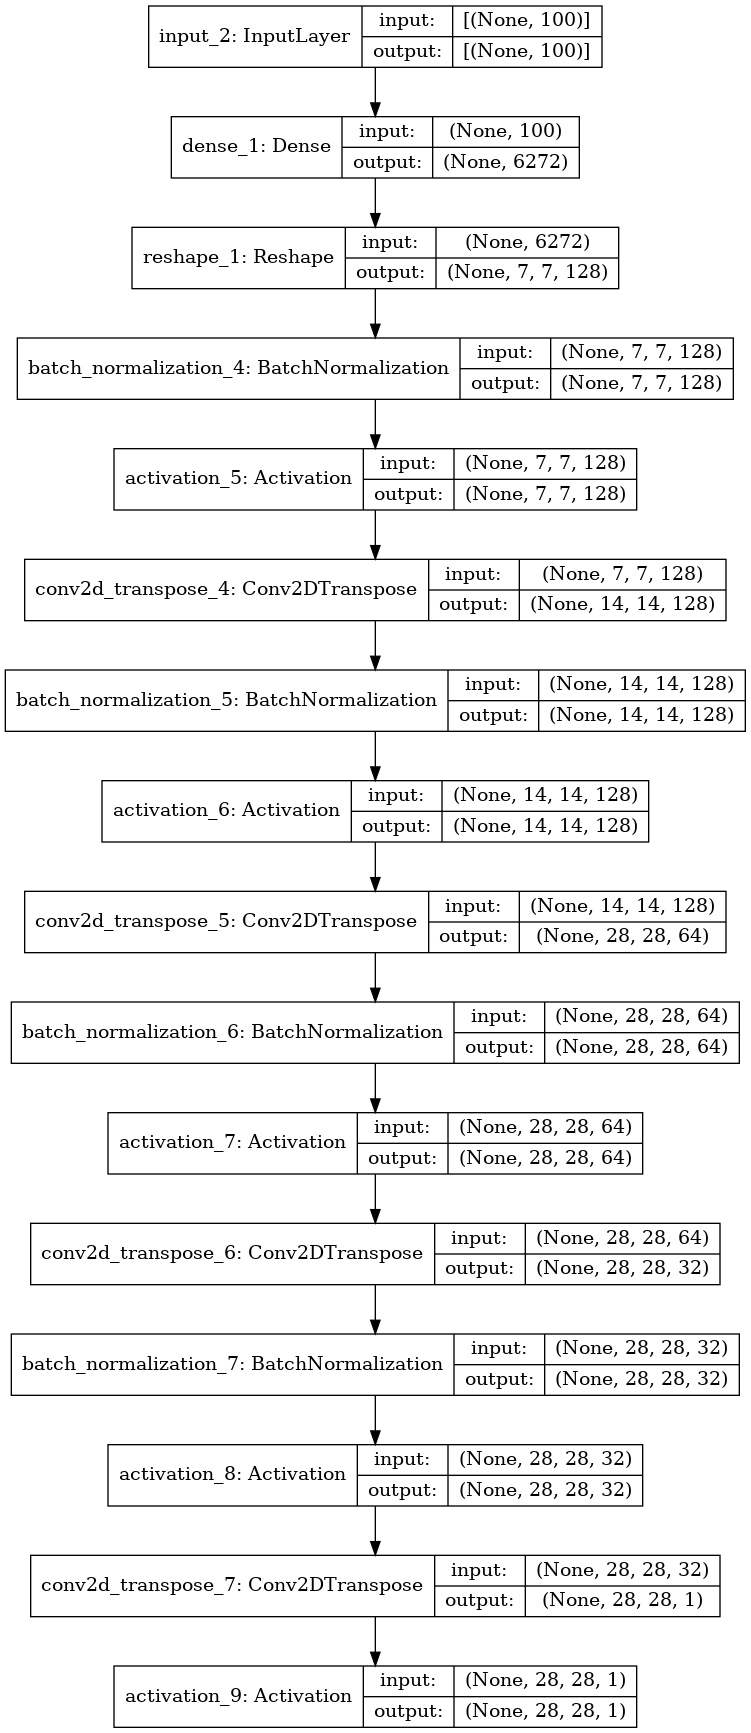

time: 531 ms (started: 2021-08-12 22:48:03 +08:00)


In [6]:
from tensorflow.keras.utils import plot_model
plot_model(build_generator(layers.Input(shape=(100,)), 28), show_shapes = True)

In [26]:
def build_discriminator(inputs):
    """Build a Discriminator Model

    Áî®‰∫éÂå∫ÂàÜÁúüÂÅáÁöÑ LeakyReLU-Conv2D Â†ÜÊ†à„ÄÇ
     ÁΩëÁªú‰∏ç‰∏é BN Êî∂ÊïõÊâÄ‰ª•ËøôÈáå‰∏ç‰ΩøÁî®
     ‰∏é [1] ÊàñÂéüÂßãËÆ∫Êñá‰∏çÂêå„ÄÇ

     ÂèÇÊï∞Ôºö
         ËæìÂÖ•ÔºàÂ±ÇÔºâÔºöÈâ¥Âà´Âô®ÁöÑËæìÂÖ•Â±ÇÔºàÂõæÂÉèÔºâ

    Returns:
        discriminator (Model): Discriminator Model
    """
    kernel_size = 5
    layer_filters = [32, 64, 128, 256]

    x = inputs
    for filters in layer_filters:
        # first 3 convolution layers use strides = 2
        # last one uses strides = 1
        if filters == layer_filters[-1]:
            strides = 1
        else:
            strides = 2
        x = BatchNormalization()(x)
        x = LeakyReLU()(x)
        x = Conv2D(filters=filters,
                   kernel_size=kernel_size,
                   strides=strides,
                   padding='same')(x)

    x = Flatten()(x)
    x = Dense(1)(x)
    x = Activation('sigmoid')(x)
    discriminator = Model(inputs, x, name='discriminator')
    return discriminator

time: 1.7 ms (started: 2021-08-12 23:23:25 +08:00)


In [27]:
build_discriminator(layers.Input(shape=(28,28,1))).summary()

Model: "discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 28, 28, 1)         4         
_________________________________________________________________
leaky_re_lu_23 (LeakyReLU)   (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 32)        832       
_________________________________________________________________
batch_normalization_27 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
leaky_re_lu_24 (LeakyReLU)   (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 64)        

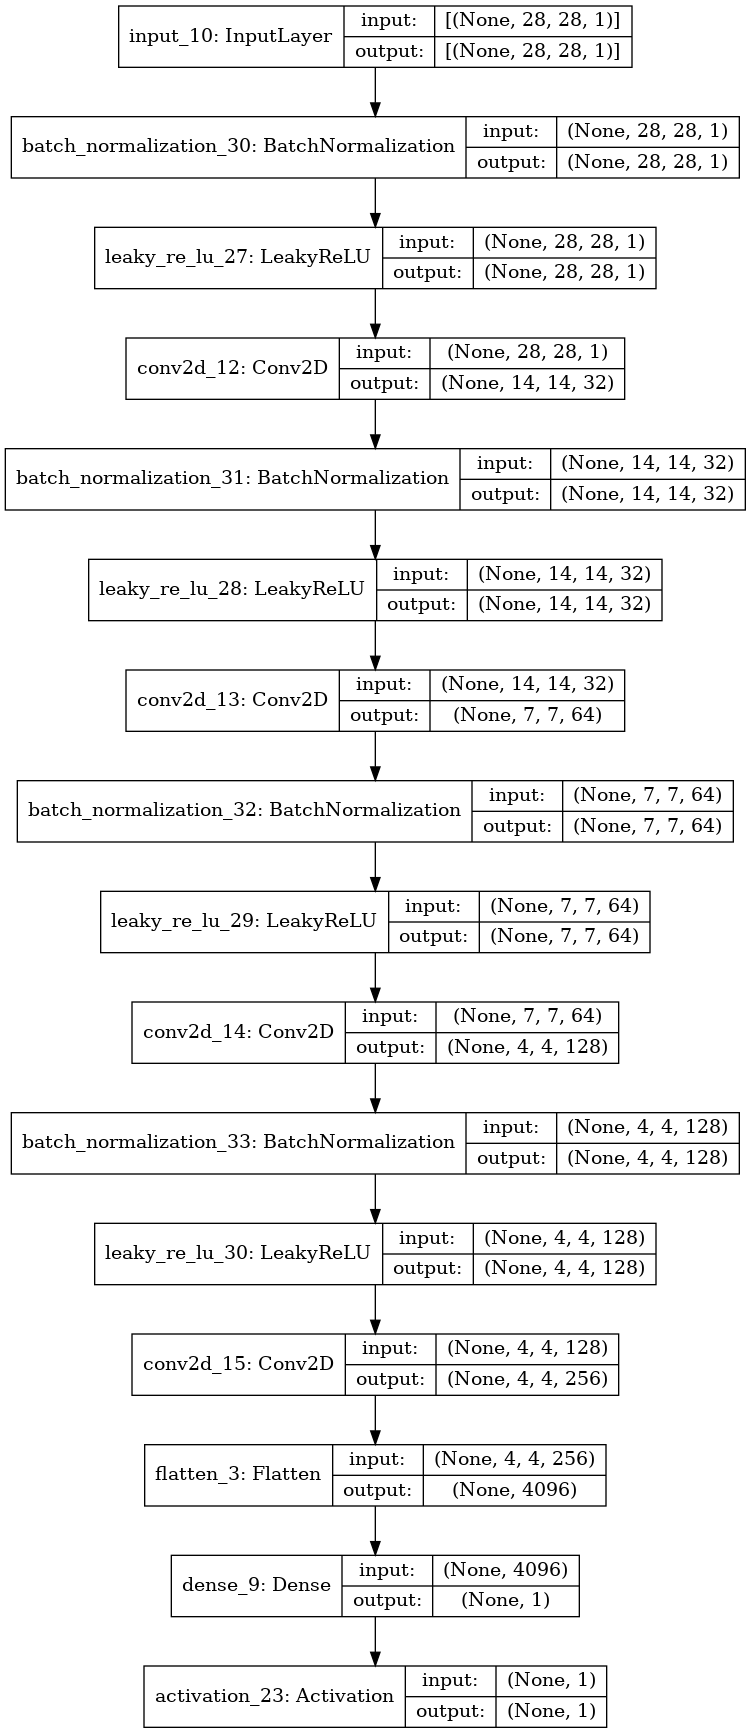

time: 680 ms (started: 2021-08-12 23:23:31 +08:00)


In [28]:
plot_model(build_discriminator(layers.Input(shape=(28,28,1))), show_shapes = True)

In [29]:
def train(models, x_train, params):
    """Train the Discriminator and Adversarial Networks

    ‰∫§ÊõøËÆ≠ÁªÉÂà§Âà´Âô®ÂíåÂØπÊäóÁΩëÁªú„ÄÇ
    È¶ñÂÖàÁî®Ê≠£Á°ÆÁöÑÁúüÂÅáÂõæÂÉèËÆ≠ÁªÉÈâ¥Âà´Âô®„ÄÇ
    Êé•‰∏ãÊù•Áî®ÂÅáË£ÖÊòØÁúüÂÆûÁöÑÂÅáÂõæÂÉèËÆ≠ÁªÉÂØπÊäó
    ÊØè‰∏™ save_interval ÁîüÊàêÁ§∫‰æãÂõæÂÉè„ÄÇ

    Arguments:
        models (list): Generator, Discriminator, Adversarial models
        x_train (tensor): Train images
        params (list) : Networks parameters

    """
    # the GAN component models
    generator, discriminator, adversarial = models
    # network parameters
    batch_size, latent_size, train_steps, model_name = params
    # the generator image is saved every 500 steps
    save_interval = 500
    # noise vector to see how the generator output evolves during training
    noise_input = np.random.uniform(-1.0, 1.0, size=[16, latent_size])
    # number of elements in train dataset
    train_size = x_train.shape[0]
    for i in range(train_steps):
        
        # ËÆ≠ÁªÉ 1 ‰∏™ÊâπÊ¨°ÁöÑÈâ¥Âà´Âô®
        # 1 ÊâπÁúüÂÆûÔºàÊ†áÁ≠æ=1.0ÔºâÂíåÂÅáÂõæÂÉèÔºàÊ†áÁ≠æ=0.0Ôºâ
        # ‰ªéÊï∞ÊçÆÈõÜ‰∏≠ÈöèÊú∫ÈÄâÊã©ÁúüÂÆûÂõæÂÉè
        rand_indexes = np.random.randint(0, train_size, size=batch_size)
        real_images = x_train[rand_indexes]
        # generate fake images from noise using generator 
        # generate noise using uniform distribution
        noise = np.random.uniform(-1.0,
                                  1.0,
                                  size=[batch_size, latent_size])
        # generate fake images
        fake_images = generator.predict(noise)
        # real + fake images = 1 batch of train data
        x = np.concatenate((real_images, fake_images))
        # label real and fake images
        # real images label is 1.0
        y = np.ones([2 * batch_size, 1])
        # fake images label is 0.0
        y[batch_size:, :] = 0.0
        # ËÆ≠ÁªÉÈâ¥Âà´Âô®ÁΩëÁªúÔºåËÆ∞ÂΩïÊçüÂ§±ÂíåÂáÜÁ°ÆÊÄß
        loss, acc = discriminator.train_on_batch(x, y)
        log = "%d: [discriminator loss: %f, acc: %f]" % (i, loss, acc)

        # ËÆ≠ÁªÉ 1 ‰∏™ÊâπÊ¨°ÁöÑÂØπÊäóÁΩëÁªú
        # 1 ÊâπÂ∏¶Êúâ label=1.0 ÁöÑÂÅáÂõæÂÉè
        # Âõ†‰∏∫Âà§Âà´Âô®ÊùÉÈáçË¢´ÂÜªÁªìÂú®ÂØπÊäóÁΩëÁªú‰∏≠
        # Âè™‰ΩøÁî®ÂùáÂåÄÂàÜÂ∏ÉÁîüÊàêÂô™Â£∞ËÆ≠ÁªÉÁîüÊàêÂô®
        noise = np.random.uniform(-1.0,
                                  1.0, 
                                  size=[batch_size, latent_size])
        # label fake images as real or 1.0
        y = np.ones([batch_size, 1])
        # ËÆ≠ÁªÉÂØπÊäóÁΩëÁªú
        # ËØ∑Ê≥®ÊÑèÔºå‰∏éÂà§Âà´Âô®ËÆ≠ÁªÉ‰∏çÂêåÔºå
        # Êàë‰ª¨‰∏çÂ∞ÜÂÅáÂõæÂÉè‰øùÂ≠òÂú®ÂèòÈáè‰∏≠
        # ÂÅáÂõæÂÉèËøõÂÖ•ÂØπÊäóÁöÑÈâ¥Âà´Âô®ËæìÂÖ•
        # Áî®‰∫éÂàÜÁ±ª
        # ËÆ∞ÂΩïÊçüÂ§±ÂíåÂáÜÁ°ÆÁéá
        loss, acc = adversarial.train_on_batch(noise, y)
        log = "%s [adversarial loss: %f, acc: %f]" % (log, loss, acc)
        print(log)
        if (i + 1) % save_interval == 0:
            # plot generator images on a periodic basis
            plot_images(generator,
                        noise_input=noise_input,
                        show=False,
                        step=(i + 1),
                        model_name=model_name)
   
    # ËÆ≠ÁªÉÁîüÊàêÂô®Âêé‰øùÂ≠òÊ®°Âûã
    # ËÆ≠ÁªÉÂ•ΩÁöÑÁîüÊàêÂô®ÂèØ‰ª•ÈáçÊñ∞Âä†ËΩΩ
    # Êú™Êù•ÁöÑ MNIST Êï∞Â≠óÁîüÊàê
    generator.save(model_name + ".h5")

time: 2.49 ms (started: 2021-08-12 23:23:38 +08:00)


In [30]:
def plot_images(generator,
                noise_input,
                show=False,
                step=0,
                model_name="gan"):
    """Generate fake images and plot them
        Âá∫‰∫éÂèØËßÜÂåñÁõÆÁöÑÔºåÁîüÊàêÂÅáÂõæÂÉè
        ÁÑ∂ÂêéÂ∞ÜÂÆÉ‰ª¨ÁªòÂà∂Âú®ÊñπÂΩ¢ÁΩëÊ†º‰∏≠

        ÂèÇÊï∞Ôºö
            generatorÔºàModelÔºâÔºöÁî®‰∫éÁîüÊàêÂÅáÂõæÂÉèÁöÑÁîüÊàêÂô®Ê®°Âûã
            noise_input (ndarray)Ôºöz ÂêëÈáèÊï∞ÁªÑ
            show (bool): ÊòØÂê¶ÊòæÁ§∫ÊÉÖËäÇ
            stepÔºàintÔºâÔºöÈôÑÂä†Âà∞‰øùÂ≠òÂõæÂÉèÁöÑÊñá‰ª∂Âêç
            model_nameÔºàstringÔºâÔºöÊ®°ÂûãÂêçÁß∞

    """
    os.makedirs(model_name, exist_ok=True)
    filename = os.path.join(model_name, "%05d.png" % step)
    images = generator.predict(noise_input)
    plt.figure(figsize=(2.2, 2.2))
    num_images = images.shape[0]
    image_size = images.shape[1]
    rows = int(math.sqrt(noise_input.shape[0]))
    for i in range(num_images):
        plt.subplot(rows, rows, i + 1)
        image = np.reshape(images[i], [image_size, image_size])
        plt.imshow(image, cmap='gray')
        plt.axis('off')
    plt.savefig(filename)
    if show:
        plt.show()
    else:
        plt.close('all')

time: 1.34 ms (started: 2021-08-12 23:23:40 +08:00)


In [ ]:
def build_and_train_models():
    # load MNIST dataset
    (x_train, _), (_, _) = mnist.load_data()

    # reshape data for CNN as (28, 28, 1) and normalize
    image_size = x_train.shape[1]
    x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
    x_train = x_train.astype('float32') / 255

    model_name = "dcgan_mnist"
    # network parameters
    # the latent or z vector is 100-dim
    latent_size = 100
    batch_size = 64
    train_steps = 40000
    lr = 2e-4
    decay = 6e-8
    input_shape = (image_size, image_size, 1)

    # build discriminator model
    inputs = Input(shape=input_shape, name='discriminator_input')
    discriminator = build_discriminator(inputs)
    # [1] or original paper uses Adam, 
    # but discriminator converges easily with RMSprop
    optimizer = RMSprop(learning_rate=lr, decay=decay)
    discriminator.compile(loss='binary_crossentropy',
                          optimizer=optimizer,
                          metrics=['accuracy'])
    discriminator.summary()

    # build generator model
    input_shape = (latent_size, )
    inputs = Input(shape=input_shape, name='z_input')
    generator = build_generator(inputs, image_size)
    generator.summary()

    # build adversarial model
    optimizer = RMSprop(learning_rate=lr * 0.5, decay=decay * 0.5)
    # Âú®ÂØπÊäóËÆ≠ÁªÉÊúüÈó¥ÂÜªÁªìÈâ¥Âà´Âô®ÁöÑÊùÉÈáç
    discriminator.trainable = False
    # adversarial = generator + discriminator
    adversarial = Model(inputs, 
                        discriminator(generator(inputs)),
                        name=model_name)
    adversarial.compile(loss='binary_crossentropy',
                        optimizer=optimizer,
                        metrics=['accuracy'])
    adversarial.summary()

    # train discriminator and adversarial networks
    models = (generator, discriminator, adversarial)
    params = (batch_size, latent_size, train_steps, model_name)
    train(models, x_train, params)


def test_generator(generator):
    noise_input = np.random.uniform(-1.0, 1.0, size=[16, 100])
    plot_images(generator,
                noise_input=noise_input,
                show=True,
                model_name="test_outputs")

    
run_generator =False

if __name__ == '__main__':
#    parser = argparse.ArgumentParser()
#    help_ = "Load generator h5 model with trained weights"
#    parser.add_argument("-g", "--generator", help=help_)
#    args = parser.parse_args()
    if run_generator:
        generator = load_model(model_name)
        test_generator(generator)
    else:
        build_and_train_models()
        

# if __name__ == '__main__':
# #    parser = argparse.ArgumentParser()
# #    help_ = "Load generator h5 model with trained weights"
# #    parser.add_argument("-g", "--generator", help=help_)
# #    args = parser.parse_args()
#     if args.generator:
#         generator = load_model(args.generator)
#         test_generator(generator)
#     else:
#         build_and_train_models()

Model: "discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa [(None, 28, 28, 1)]       0         
_________________________________________________________________
batch_normalization_34 (Batc (None, 28, 28, 1)         4         
_________________________________________________________________
leaky_re_lu_31 (LeakyReLU)   (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 32)        832       
_________________________________________________________________
batch_normalization_35 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
leaky_re_lu_32 (LeakyReLU)   (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 64)        